## create data frame using dictionary

In [1]:
country = ["sapin" , "france"]
population = ["11" , "12"]
list_label = ["country" ,"population"]
cuntry_label = [country , population]
zipped = list(zip(list_label , cuntry_label))

In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame(dict(zipped))

In [4]:
df

,country,population
0,sapin,11
1,france,12


In [5]:
dict(zipped)

{'country': ['sapin', 'france'], 'population': ['11', '12']}

In [6]:
### add new columns

In [7]:
df["capital"] = ["madrid" , "paris"]

In [8]:
df

,country,population,capital
0,sapin,11,madrid
1,france,12,paris


In [9]:
##broadcasting

In [10]:
df["income"] = 15

In [11]:
df

,country,population,capital,income
0,sapin,11,madrid,15
1,france,12,paris,15


In [12]:
#data = df.loc[: , ['country' ,'population']]

In [13]:
#data.plot(subplots = True)

In [14]:
#data,plot(kind = "scatter" ,x = 'country' , y = 'popukation')

In [15]:
# data.plot(kind = "hist" , y ="counrty" ,bins = 50 ,range = (0,250) )

In [16]:
time_list = ["1992-03-08","1992-04-12"]

In [17]:
print(type(time_list))

<class 'list'>


In [18]:
import pandas as pd

In [19]:
datetime =  pd.to_datetime(time_list)

In [20]:
type(df["country"])

pandas.core.series.Series

In [21]:
type(df[["country"]])

pandas.core.frame.DataFrame

In [22]:
df[["country"]]

,country
0,sapin
1,france


In [23]:
df

,country,population,capital,income
0,sapin,11,madrid,15
1,france,12,paris,15


In [24]:
boolean = df.income>10

In [25]:
df[boolean]

,country,population,capital,income
0,sapin,11,madrid,15
1,france,12,paris,15


In [26]:
ds = df.set_index(["capital" , "income"])

In [27]:
ds

,,country,population
capital,income,,
madrid,15,sapin,11
paris,15,france,12


In [28]:
dic = {"treatment":["A","A","B","B"],"gender":["F","M","F","M"],"response":[10,45,5,9],"age":[15,4,72,65]}

In [29]:
ds = pd.DataFrame(dic , index = list(range(1,5)))
df = ds
ds

,age,gender,response,treatment
1,15,F,10,A
2,4,M,45,A
3,72,F,5,B
4,65,M,9,B


In [30]:
ds.pivot(index = "treatment" , columns = "gender" , values="response")

gender,F,M
treatment,,
A,10,45
B,5,9


## stacking and unstacking

In [31]:
df1 = df.set_index(["treatment","gender"])
df1

age  response
treatment gender               
A         F        15        10
          M         4        45
B         F        72         5
          M        65         9

In [32]:
df1.unstack(level = 0)

age     response   
treatment   A   B        A  B
gender                       
F          15  72       10  5
M           4  65       45  9

In [33]:
df

,age,gender,response,treatment
1,15,F,10,A
2,4,M,45,A
3,72,F,5,B
4,65,M,9,B


In [34]:
df.groupby("treatment").response.mean()


treatment
A    27.5
B     7.0
Name: response, dtype: float64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 1 to 4
Data columns (total 4 columns):
age          4 non-null int64
gender       4 non-null object
response     4 non-null int64
treatment    4 non-null object
dtypes: int64(2), object(2)
memory usage: 160.0+ bytes


In [36]:
df["gender"] = df["gender"].astype("category")

In [37]:
df["treatment"] = df["treatment"].astype("category")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 1 to 4
Data columns (total 4 columns):
age          4 non-null int64
gender       4 non-null category
response     4 non-null int64
treatment    4 non-null category
dtypes: category(2), int64(2)
memory usage: 296.0 bytes


## classifiaction Problem

In [39]:
df = pd.read_csv("C:\\Users\\DU357159\\Downloads\\iris-species\\Iris.csv")

In [40]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
## check how many species 

In [42]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [43]:
data = df

In [44]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

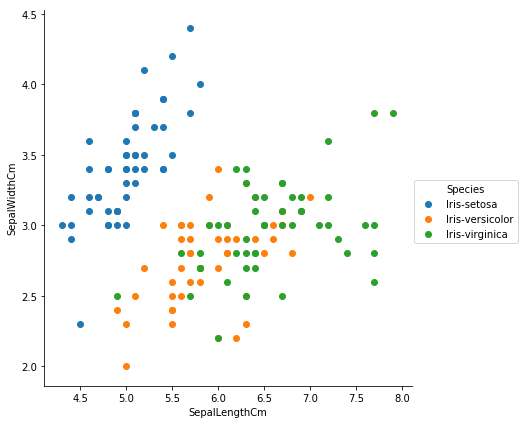

In [46]:
sns.FacetGrid(data ,hue = "Species" , size = 6).map(plt.scatter , "SepalLengthCm" , "SepalWidthCm").add_legend()

### Preprocessing Steps: Separating Independent Features and Dependant Feature(Response)

In [47]:
features = data.columns[1:5]
target = data.columns[5]

In [48]:
print(features)
print(target)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')
Species


In [49]:
X  = data.iloc[: , 1:5]
Y = data.iloc[: , 5]

In [50]:
X.shape

(150, 4)

In [51]:
Y.shape

(150,)

### Converting Response Variable 'Species' to numbers to train model and add column

In [52]:
from sklearn import preprocessing

In [53]:
le = preprocessing.LabelEncoder()

In [54]:
y = le.fit_transform(Y)

In [55]:
data["encoded_species"] = y

In [56]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,encoded_species
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2


In [57]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,encoded_species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [58]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


## classifiaction models

#### KNN(k-nearest neighbors classifiction)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [61]:
value = knn.predict([[3, 5, 4, 2]])
print('prediction value:',value)

print('Predicted Class' , data.loc[data['encoded_species'] == 2, 'Species'].values[0])

prediction value: [2]
Predicted Class Iris-virginica


In [62]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]                        # Consider them as two new rows of input features in X
knn.predict(X_new)

array([2, 1], dtype=int64)

In [63]:
print('Predicted Class' , data.loc[data['encoded_species'] == 1, 'Species'].values[0])

Predicted Class Iris-versicolor


#### knn for k =5

In [64]:
knn= KNeighborsClassifier(n_neighbors=5)

In [65]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [66]:
knn.predict(X_new)

array([1, 1], dtype=int64)

In [67]:
key_pred = knn.predict(X)

In [68]:
from sklearn import metrics

In [69]:
metrics.accuracy_score(y,key_pred)

0.9666666666666667

## how to choose best K

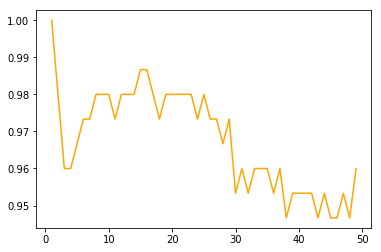

In [70]:
v = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X,y)
    key_pred = knn.predict(X)
    v.append(metrics.accuracy_score(y ,key_pred))

import matplotlib.pyplot as plt
plt.plot(list(range(1,50)) , v ,c = "orange")
plt.show()
    

## knn with train test

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train ,X_test ,y_train,y_test = train_test_split(X ,y , test_size = 0.4, random_state = 4)

In [73]:
print(X_train.shape)
print(y_train.shape)

(90, 4)
(90,)


In [74]:
from sklearn import metrics

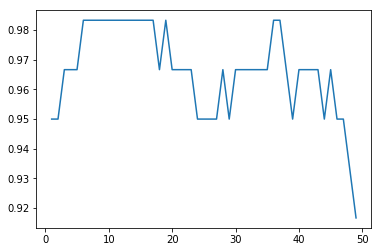

In [75]:
v = []
knn_range = list(range(1,50))
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    key_pred = knn.predict(X_test)
    v.append(metrics.accuracy_score(y_test,key_pred))
import matplotlib.pyplot as plt
plt.plot(knn_range,v )
plt.show()
    

In [76]:
## best value is near 10

In [77]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_test ,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')

In [78]:
key_pred = knn.predict(X_test)

In [79]:
metrics.accuracy_score(y_test ,key_pred)

0.9166666666666666

## using logistic regression model

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
logres = LogisticRegression()
logres.fit(X_train,y_train) # train data


# predict from test
log_pred = logres.predict(X_test)

# check accuracy
import sklearn.metrics as mt
mt.accuracy_score(log_pred,y_test)

0.95

## Regression

In [82]:
import pandas as pd
import numpy as np

In [84]:
df = pd.read_csv("C:\\Users\\DU357159\\Documents\\ENU_DATA\\data_ml\\kc_house_data.csv")

In [85]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


C:\Users\DU357159\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


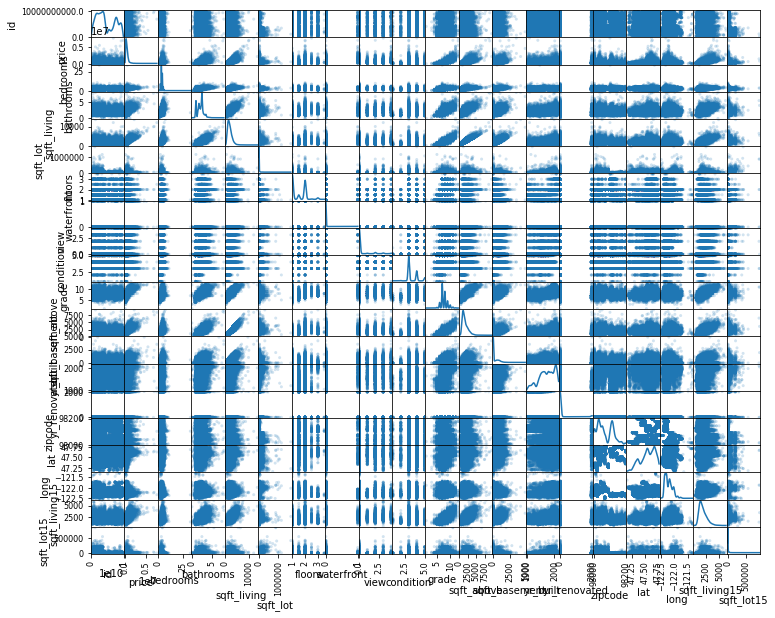

In [86]:
pd.scatter_matrix(df, alpha=.2, figsize=(12,10), diagonal='kde')
plt.show()

In [87]:
space = df["sqft_living"]
price = df["price"]

In [88]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [89]:
x = np.array(space).reshape(-1,1)
y = np.array(price).reshape(-1,1)

In [90]:
x.shape

(21613, 1)

In [91]:
y.shape

(21613, 1)

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train ,x_test ,y_train,y_test = train_test_split(x, y, test_size = 0.3 , random_state = 2)

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
regression = LinearRegression()
model = regression.fit(x_train , y_train)

In [96]:
pred = model.predict(x_test)
model.score(x_train,y_train)

0.4917225687188175

In [97]:
import matplotlib.pyplot as plt

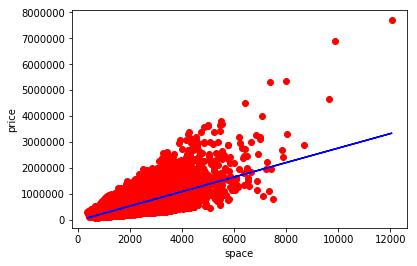

In [98]:
plt.scatter(x_train ,y_train, c = "red")
plt.plot(x_train ,model.predict(x_train) ,c = "blue")
plt.xlabel("space")
plt.ylabel("price")
plt.show()

In [99]:
## for test data

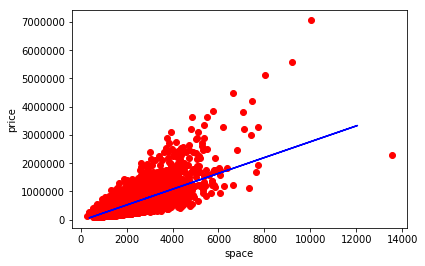

In [100]:
plt.scatter(x_test,y_test ,c = "red")
plt.plot(x_train , model.predict(x_train) , c= "blue")
plt.xlabel("space")
plt.ylabel("price")
plt.show()

In [101]:
from sklearn import metrics
import math

In [102]:
math.sqrt(metrics.mean_squared_error(y_test ,pred))

265193.2042328294

## CROSS VALIDATION
As you know in KNN method we use train test split with random_state that split exactly same at each time. However, if we do not use random_state, data is split differently at each time and according to split accuracy will be different. Therefore, we can conclude that model performance is dependent on train_test_split. For example you split, fit and predict data 5 times and accuracies are 0.89, 0.9, 0.91, 0.92 and 0.93, respectively. Which accuracy do you use? Do you know what accuracy will be at 6th times split, train and predict. The answer is I do not know but if I use cross validation I can find acceptable accuracy. 
Cross Validation (CV)

K folds = K fold CV.
Look at this image it defines better than me :)
When K is increase, computationally cost is increase
cross_val_score(reg,x,y,cv=5): use reg(linear regression) with x and y that we define at above and K is 5. It means 5 times(split, train,predict)

In [103]:
from sklearn.model_selection import cross_val_score

In [104]:
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg,x_train,y_train,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.4816129  0.46208302 0.49532865 0.50276691 0.51205992]
CV scores average:  0.490770281686833


## Regularized Regression
As we learn linear regression choose parameters (coefficients) while minimizing lost function. If linear regression thinks that one of the feature is important, it gives high coefficient to this feature. However, this can cause overfitting that is like memorizing in KNN. In order to avoid overfitting, we use regularization that penalize large coefficients.

## Ridge regression: First regularization technique. Also it is called L2 regularization.
Ridge regression lost fuction = OLS + alpha * sum(parameter^2)
alpha is parameter we need to choose to fit and predict. Picking alpha is similar to picking K in KNN. As you understand alpha is hyperparameter that we need to choose for best accuracy and model complexity. This process is called hyperparameter tuning.
What if alpha is zero? lost function = OLS so that is linear rigression :)
If alpha is small that can cause overfitting

If alpha is big that can cause underfitting. But do not ask what is small and big. These can be change from problem to problem.
## Lasso regression: Second regularization technique. Also it is called L1 regularization.
Lasso regression lost fuction = OLS + alpha * sum(absolute_value(parameter))
It can be used to select important features od the data. Because features whose values are not shrinked to zero, is chosen by lasso regression
In order to choose feature, I add new features in our regression data

In [105]:
from sklearn.linear_model import Lasso

In [106]:

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.3)

In [107]:
lasso = Lasso(alpha = 0.1 , normalize = True)

In [108]:
lasso.fit(x_train ,y_train)
print(x_train.shape ,y_train.shape)

(15129, 1) (15129, 1)


In [109]:
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)

Lasso score:  0.494801453026819
Lasso coefficients:  [280.50027698]


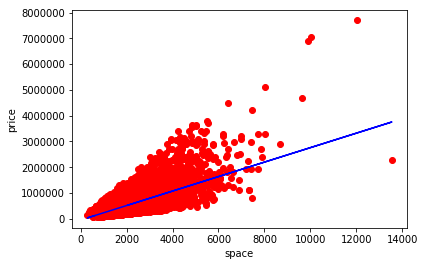

In [110]:
plt.scatter(x_train ,y_train, c = "red")
plt.plot(x_train ,lasso.predict(x_train) ,c = "blue")
plt.xlabel("space")
plt.ylabel("price")
plt.show()

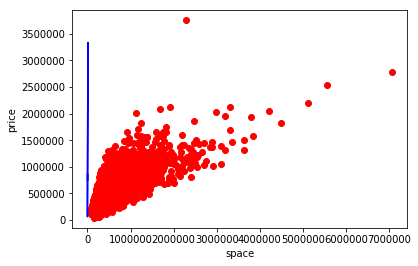

In [114]:
plt.scatter(y_test,model.predict(x_test) ,c = "red")
plt.plot(x_train ,model.predict(x_train) ,c = "blue")
plt.xlabel("space")
plt.ylabel("price")
plt.show()

In [115]:
from sklearn.linear_model import Ridge
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2, test_size = 0.3)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))

Ridge score:  0.49064891200239086


In [116]:
print('ridge coeff' , ridge.coef_)

ridge coeff [[254.62474763]]


## Linear Regression for Price Analysis

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [190]:
df = pd.read_csv("C:\\Users\\DU357159\\Documents\\ENU_DATA\\data_ml\\Melbourne_housing_FULL.csv")

In [191]:
df["Date"] = pd.to_datetime(df["Date"] ,dayfirst=True)

In [192]:
var = df[df["Type"] == "h"].sort_values("Date" ,ascending = False).groupby("Date").std()
count = df[df["Type"] == "h"].sort_values("Date" , ascending = False).groupby("Date").count()
mean  = df[df["Type"] == "h"].sort_values("Date" , ascending = False).groupby("Date").mean()

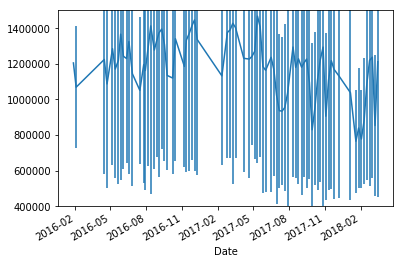

In [193]:
mean["Price"].plot(yerr=var["Price"],ylim=(400000,1500000))

In [194]:
df[df["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").mean()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Date,,,,,,,,,,,,,
2016-01-28,3.500000,1.205000e+06,10.100000,3126.500000,3.500000,1.500000,1.000000,649.000000,198.000000,1910.000000,-37.829800,145.087850,4361.000000
2016-02-04,2.958333,1.068888e+06,10.245833,3091.083333,2.842105,1.368421,1.842105,484.947368,126.333333,1963.076923,-37.834721,144.997153,5622.791667
2016-04-16,3.271552,1.224499e+06,8.964655,3091.806034,3.089947,1.645503,1.645503,481.984127,154.068376,1942.500000,-37.803719,144.989346,7363.405172
2016-04-23,3.181818,1.087059e+06,8.721818,3078.445455,3.034483,1.459770,1.528736,908.218391,145.666667,1941.431373,-37.784748,144.975782,7364.154545
2016-05-07,3.279152,1.285205e+06,8.995760,3099.922261,3.164502,1.627706,1.670996,553.207792,166.137931,1945.369427,-37.816396,144.997093,7151.759717
2016-05-14,3.191176,1.171023e+06,8.664216,3093.058824,3.089286,1.648810,1.577381,460.934524,174.868132,1948.295238,-37.804652,144.992144,7352.269608
2016-05-22,3.330144,1.218111e+06,9.051675,3093.019139,3.165680,1.639053,1.751479,505.349112,175.427184,1948.227273,-37.804988,144.984088,6654.267943
2016-05-28,3.452055,1.366617e+06,9.108219,3102.407534,3.220339,1.665254,1.656780,544.563559,178.414286,1948.051613,-37.807166,144.998750,7195.623288
2016-06-04,3.356164,1.242345e+06,9.271233,3096.415525,3.220339,1.734463,1.700565,513.435028,182.311927,1947.388889,-37.816580,144.993675,6640.922374


In [195]:
df[(df["Type"]=="h") & (df["Distance"] < 14) & (df['Distance'] >13.7)].sort_values("Date", ascending=False).dropna().groupby(["Suburb","SellerG"]).mean()

Rooms         Price   Distance  Postcode  \
Suburb            SellerG                                                      
Albion            Barry          2.333333  7.350000e+05  13.900000    3020.0   
                  Bells          3.000000  7.820000e+05  13.900000    3020.0   
                  Sweeney        3.000000  5.965000e+05  13.900000    3020.0   
                  hockingstuart  3.000000  7.300000e+05  13.900000    3020.0   
Altona            Barlow         3.000000  1.120000e+06  13.800000    3018.0   
                  Compton        2.000000  5.356000e+05  13.800000    3018.0   
                  Greg           3.833333  1.134167e+06  13.800000    3018.0   
                  hockingstuart  3.000000  9.287500e+05  13.800000    3018.0   
Bentleigh East    Beller         3.000000  9.000000e+05  13.900000    3165.0   
                  Buxton         3.250000  1.172250e+06  13.862500    3165.0   
                  C21            3.333333  9.076667e+05  13.900000    3165.0   
                  First          4.000000  1.035000e+06  13.900000    3165.0   
                  Gary           4.000000  1.420000e+06  13.860000    3165.0   
                  Hodges         4.200000  1.301900e+06  13.900000    3165.0   
                  Jellis         3.363636  1.333182e+06  13.800000    3165.0   
                  Marshall       4.000000  1.365000e+06  13.900000    3165.0   
                  Nick           3.000000  1.020000e+06  13.900000    3165.0   
                  RT             4.000000  1.175000e+06  13.900000    3165.0   
                  Ray            3.000000  8.966667e+05  13.900000    3165.0   
                  Woodards       3.181818  1.133318e+06  13.872727    3165.0   
                  hockingstuart  3.692308  1.381568e+06  13.869231    3165.0   
Doncaster         Barry          3.571429  1.381536e+06  13.900000    3108.0   
                  Fletchers      3.000000  1.250000e+06  13.900000    3108.0   
                  Jellis         3.900000  1.461880e+06  13.900000    3108.0   
                  Philip         3.500000  1.412250e+06  13.900000    3108.0   
                  RW             4.000000  1.401000e+06  13.900000    3108.0   
                  Ray            3.428571  1.214857e+06  13.900000    3108.0   
                  Vic            3.000000  1.100000e+06  13.900000    3108.0   
                  hockingstuart  3.500000  1.496500e+06  13.900000    3108.0   
Hampton           Buxton         3.500000  2.597500e+06  13.800000    3188.0   
                  Charlton       3.000000  1.615000e+06  13.800000    3188.0   
                  Follett        4.000000  1.820000e+06  13.800000    3188.0   
                  Hodges         4.000000  2.550000e+06  13.800000    3188.0   
                  Marshall       4.000000  2.668000e+06  13.800000    3188.0   
                  Nick           3.000000  1.450000e+06  13.800000    3188.0   
                  hockingstuart  4.000000  2.025000e+06  13.800000    3188.0   
Hampton East      Buxton         3.750000  1.399875e+06  13.800000    3188.0   
                  Hodges         3.000000  9.900000e+05  13.800000    3188.0   
Templestowe Lower Barry          3.823529  1.226618e+06  13.800000    3107.0   
                  Jellis         3.571429  1.263714e+06  13.800000    3107.0   
                  Mason          4.000000  7.900000e+05  13.800000    3107.0   
                  Philip         3.333333  1.023833e+06  13.800000    3107.0   
                  RT             3.000000  6.500000e+05  13.800000    3107.0   
                  Zahn           4.000000  1.201000e+06  13.800000    3107.0   
                  hockingstuart  4.500000  8.750000e+05  13.800000    3107.0   
Viewbank          Barry          3.000000  7.700000e+05  13.800000    3084.0   
                  Buckingham     3.000000  8.800000e+05  13.800000    3084.0   
                  Darren         4.000000  1.005000e+06  13.800000    3084.0   
                  Fletchers      4.0

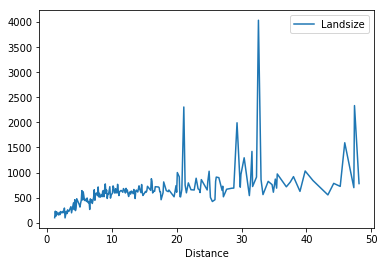

In [196]:
df[(df["Rooms"]>2) & (df["Type"] == "h")& (df["Landsize"] <5000)][["Landsize" , "Distance"]].dropna().groupby("Distance").mean().plot()

In [197]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

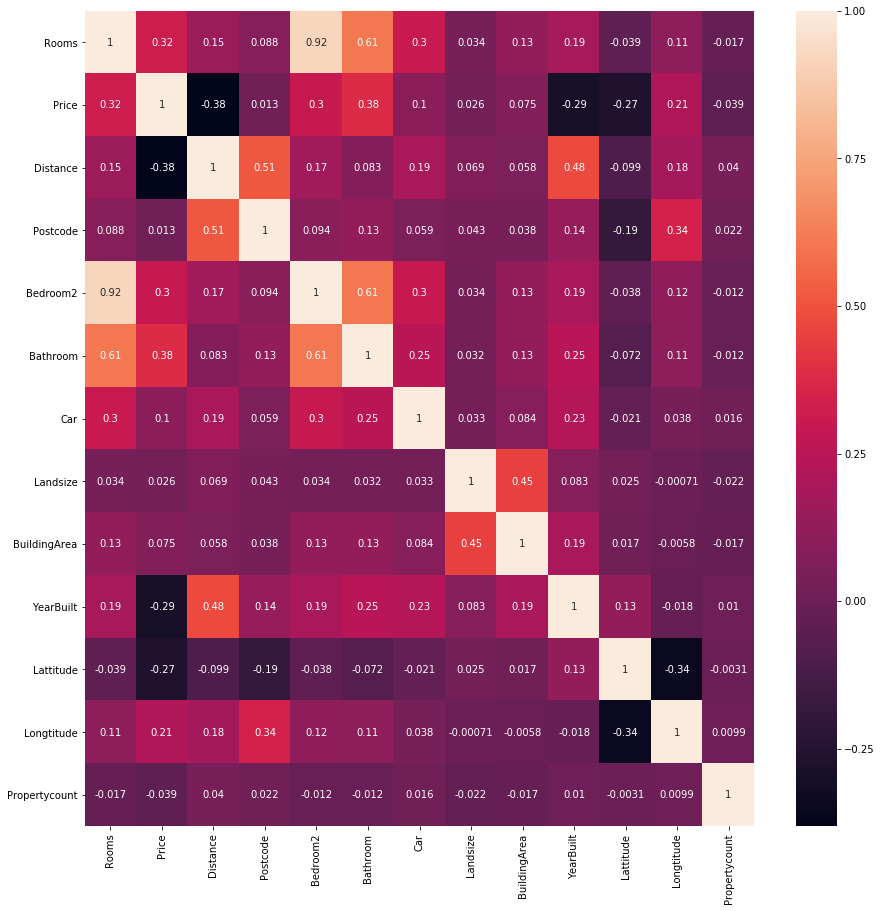

In [198]:
fig , ax = plt.subplots(figsize = (15,15))
sns.heatmap(df[df["Type"] == "h"].corr(), annot=True)

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
dataframe_dr = df.dropna().sort_values("Date")

In [201]:
days_since_start = [(x - dataframe_dr["Date"].min()).days for x in dataframe_dr["Date"]]

In [202]:
dataframe_dr["Days"] = days_since_start


In [203]:
suburb_dummies = pd.get_dummies(dataframe_dr[["Type", "Method"]])

In [204]:
all_Data = dataframe_dr.drop(["Address","Price","Date", "SellerG","Suburb","Type","Method","CouncilArea","Regionname"],axis=1).join(suburb_dummies)

In [205]:
all_Data

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,Propertycount,Days,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
2,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,...,4019.0,0,1,0,0,0,1,0,0,0
10256,2,6.5,3071.0,2.0,1.0,2.0,164.0,95.0,2009.0,-37.75360,...,8870.0,0,0,1,0,0,1,0,0,0
11836,2,13.9,3020.0,2.0,1.0,2.0,672.0,111.0,1958.0,-37.78120,...,2185.0,0,1,0,0,0,0,1,0,0
6526,3,8.7,3032.0,3.0,2.0,2.0,77.0,115.0,2004.0,-37.77460,...,4918.0,0,0,1,0,0,0,0,0,1
4385,1,6.4,3011.0,1.0,1.0,1.0,0.0,50.0,1970.0,-37.79070,...,7570.0,0,0,0,1,0,1,0,0,0
6781,2,11.8,3127.0,2.0,2.0,2.0,0.0,80.0,2003.0,-37.81610,...,2079.0,0,0,0,1,0,1,0,0,0
3962,3,8.0,3040.0,3.0,2.0,2.0,225.0,98.0,2008.0,-37.74540,...,9264.0,0,1,0,0,0,1,0,0,0
232,2,13.8,3018.0,2.0,1.0,2.0,292.0,125.0,2013.0,-37.86870,...,5301.0,0,0,1,0,0,1,0,0,0
3828,3,7.7,3184.0,3.0,2.0,1.0,400.0,126.0,1996.0,-37.88290,...,8989.0,0,0,1,0,0,1,0,0,0
6962,3,14.6,3189.0,3.0,2.0,2.0,653.0,180.0,1950.0,-37.94180,...,2555.0,0,1,0,0,0,1,0,0,0


In [206]:
x = all_Data

In [207]:
y = dataframe_dr["Price"]

In [208]:
x_train , x_test , y_train , y_test = train_test_split(x,y ,test_size = 0.4,random_state = 2)

In [209]:
print(x_train.shape , y_train.shape)
print(x_test.shape ,y_test.shape)

(5332, 21) (5332,)
(3555, 21) (3555,)


In [210]:
from sklearn.linear_model import LinearRegression

In [211]:
model = LinearRegression()


In [212]:
model.fit(x_train ,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [213]:
model.intercept_

-132565008.37763079

In [214]:
x.columns

Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount', 'Days', 'Type_h', 'Type_t', 'Type_u', 'Method_PI',
       'Method_S', 'Method_SA', 'Method_SP', 'Method_VB'],
      dtype='object')

In [215]:
model.coef_

array([ 1.36430119e+05, -4.49753021e+04,  7.84491935e+02, -2.75738436e+04,
        2.11412297e+05,  5.58149941e+04,  4.66320327e+01,  1.67862216e+03,
       -3.68016011e+03, -1.29218776e+06,  6.13032710e+05,  4.09457430e-01,
        1.13504686e+02,  1.55494911e+05,  5.64728265e+03, -1.61142193e+05,
       -1.29486160e+04,  4.10587651e+04, -4.85112595e+04, -1.87031248e+04,
        3.91042351e+04])

In [216]:
coef_df = pd.DataFrame(model.coef_ , x.columns ,columns=["Coefficient"])

In [217]:
ranked_df = coef_df.sort_values("Coefficient" , ascending = False)

In [218]:
ranked_df

,Coefficient
Longtitude,6.130327e+05
Bathroom,2.114123e+05
Type_h,1.554949e+05
Rooms,1.364301e+05
Car,5.581499e+04
Method_S,4.105877e+04
Method_VB,3.910424e+04
Type_t,5.647283e+03
BuildingArea,1.678622e+03
Postcode,7.844919e+02


In [226]:
pred = model.predict(x_test)
model.score(x_train ,y_train)

0.6183602989841918

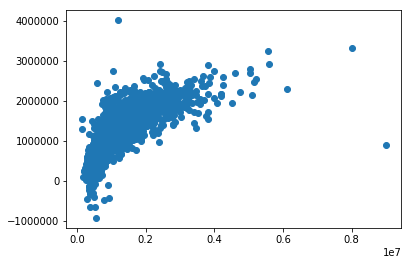

In [220]:
plt.scatter(y_test , model.predict(x_test))

In [221]:
from sklearn import metrics

In [222]:
print("mse" , metrics.mean_squared_error(y_test ,pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


mse 185173977301.09958
RMSE: 430318.46033036924


## Getting Started with Kaggle: House Prices Competition

In [33]:
import pandas as pd
import numpy as np

In [34]:
df  = pd.read_csv("C:\\Users\\DU357159\\Documents\\ENU_DATA\\data_ml\\house_price_prediction\\sample_submission.csv")

In [35]:
df.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [36]:
train = pd.read_csv("C:\\Users\\DU357159\\Documents\\ENU_DATA\\data_ml\\house_price_prediction\\train.csv")
test = pd.read_csv("C:\\Users\\DU357159\\Documents\\ENU_DATA\\data_ml\\house_price_prediction\\test.csv")

In [70]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [38]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [39]:
#We see that test has only 80 columns, while train has 81. This is due to, of course, 
#the fact that the test data do not include the final sale price information!

## Step 2: Explore the data and engineer Features

### our target variable is "saleprice" we will see first about skewness of data of target variable
### for this we plot historam of "salesprice" and saw that its tail is negative skewed .generally taking log 
### in linear regression work out to remove the skewness

In [40]:
#train[["SalePrice"]]
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [41]:
### Series.describe() gives you more information about any series. count displays the total number of rows in the series. 
###For numerical data, Series.describe() also gives the mean, std, min and max values as well.
###The average sale price of a house in our dataset is close to $180,000, 
###with most of the values falling within the $130,000 to $215,000 range.

In [42]:
print("Skew of SalePrice" , train.SalePrice.skew())

Skew of SalePrice 1.8828757597682129


In [43]:
import matplotlib.pyplot as plt

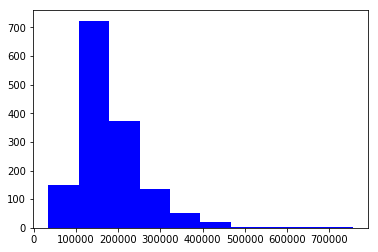

In [44]:
plt.hist(train.SalePrice ,color = "blue")
plt.show()

Skew is: 0.12133506220520406


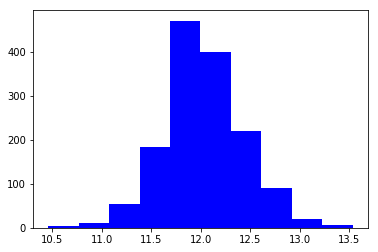

In [45]:
### now we take log to remove skewness
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

Now that we've transformed the target variable, let's consider our features. First, we'll check out the numerical features and make some plots. The .select_dtypes() method will return a subset of columns matching the specified data types.

#### select numeric features

In [56]:
numeric_features = train.select_dtypes(include = [np.number])

In [57]:
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

##### The DataFrame.corr() method displays the correlation (or relationship) between the columns. We'll examine the correlations between the features and the target

In [48]:
import seaborn as sns

In [60]:
#fig , ax = plt.subplots(figsize = (20,20))
#sns.heatmap(numeric_features.corr() , annot  = True)

In [59]:
numeric_features.corr().head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


In [61]:
corr = numeric_features.corr()

In [65]:
print(corr["SalePrice"].sort_values(ascending = False)[:5])
print(corr["SalePrice"].sort_values(ascending = False)[-5:])


SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


##### The first five features are the most positively correlated with SalePrice, while the next five are the most negatively correlated.Let's dig deeper on OverallQual. We can use the .unique() method to get the unique values.

In [66]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

#### The OverallQual data are integer values in the interval 1 to 10 inclusive.We can create a pivot table to further investigate the relationship between OverallQual and SalePrice. The Pandas docs demonstrate how to accomplish this task. We set index='OverallQual' and values='SalePrice'. We chose to look at the median here.

In [67]:
quality_pivot = train.pivot_table(index = "OverallQual" ,values="SalePrice",aggfunc = np.median)

In [68]:
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


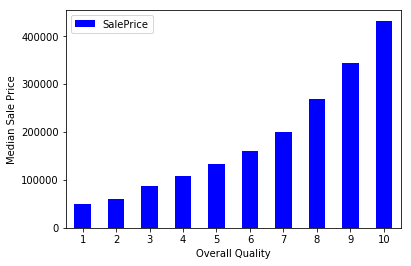

In [71]:
quality_pivot.plot(kind = "bar" , color = "blue")
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

Text(0.5,0,'GrLivArea')

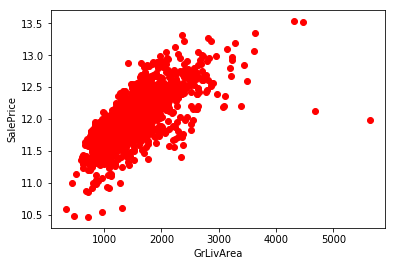

In [76]:
plt.scatter(train["GrLivArea"] , y=target ,color = "red")
plt.ylabel("SalePrice")
plt.xlabel("GrLivArea")

Text(0,0.5,'saleprice')

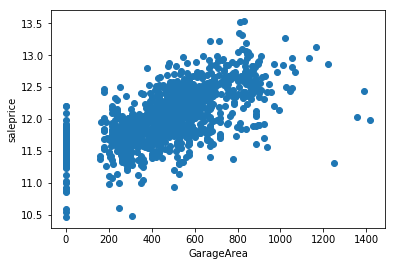

In [77]:
plt.scatter(train["GarageArea"] , target)
plt.xlabel("GarageArea")
plt.ylabel("saleprice")

In [78]:
train = train[train['GarageArea'] < 1200]


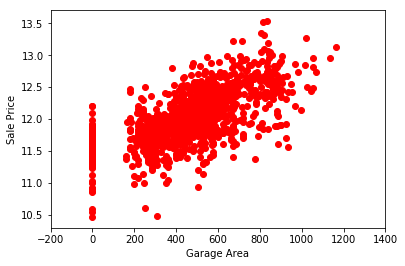

In [85]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice) , color = "red")
plt.xlim(-200,1400) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

## Handling Null Values

In [101]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending = False))[:25]

In [103]:
nulls.columns = ["Null Values"]
nulls.index.name = "Features"

In [104]:
nulls

,Null Values
Features,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


## Wrangling the non-numeric Features


In [109]:
categorical = train.select_dtypes(exclude = [np.number])

In [110]:
categorical.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


The count column indicates the count of non-null observations, while unique counts the number of unique values. top is the most commonly occurring value, with the frequency of the top value shown by freq.

For many of these features, we might want to use one-hot encoding to make use of the information for modeling.
One-hot encoding is a technique which will transform categorical data into numbers so the model can understand whether or not a particular observation falls into one category or another.

## Transforming and engineering features


When transforming features, it's important to remember that any transformations that you've applied to the training data before fitting the model must be applied to the test data.

Our model expects that the shape of the features from the train set match those from the test set. This means that any feature engineering that occurred while working on the train data should be applied again on the test set.

To demonstrate how this works, consider the Street data, which indicates whether there is Gravel or Paved road access to the property.

In [112]:
print(train.Street.value_counts())

Pave    1450
Grvl       5
Name: Street, dtype: int64


In the Street column, the unique values are Pave and Grvl, which describe the type of road access to the property. In the training set, only 5 homes have gravel access. Our model needs numerical data, so we will use one-hot encoding to transform the data into a Boolean column.

We create a new column called enc_street. The pd.get_dummies() method will handle this for us.

As mentioned earlier, we need to do this on both the train and test data

In [116]:
train["enc_street"] = pd.get_dummies(train["Street"],drop_first = True)
test["enc_street"] = pd.get_dummies(test["Street"],drop_first = True)

In [117]:
print(train.enc_street.value_counts())

1    1450
0       5
Name: enc_street, dtype: int64


In [118]:
## check another feture realtion with saleprice


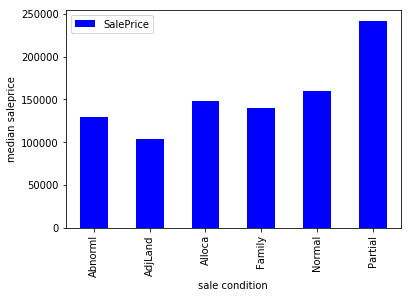

In [120]:
pivot = train.pivot_table(index ="SaleCondition" ,values = "SalePrice" ,aggfunc = np.median)
pivot.plot(kind= "bar" ,color = "blue")
plt.xlabel("sale condition")
plt.ylabel("median saleprice")
plt.show()

In [121]:
def function(x):
    if x == "Partial":
        return 1
    else :
        return 0
train["enc_condition"] = train["SaleCondition"].apply(function)
test["enc_condition"] = test["SaleCondition"].apply(function)

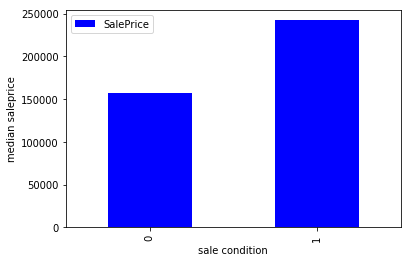

In [123]:
pivot = train.pivot_table(index ="enc_condition" ,values = "SalePrice" ,aggfunc = np.median)
pivot.plot(kind= "bar" ,color = "blue")
plt.xlabel("sale condition")
plt.ylabel("median saleprice")
plt.show()

In [136]:
data = train.select_dtypes(include = [np.number]).interpolate().dropna()

## build the model

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [163]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

In [165]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [166]:
model = lr.fit(X_train, y_train)

## Evaluate the performance and visualize results
Now, we want to evaluate the performance of the model.
Each competition might evaluate the submissions differently. In this competition, Kaggle will evaluate our submission using root-mean-squared-error (RMSE). We'll also look at The r-squared value. 
##### The r-squared value is a measure of how close the data are to the fitted regression line. It takes a value between 0 and 1, 1 meaning that all of the variance in the target is explained by the data. In general, a higher r-squared value means a better fit.

The model.score() method returns the r-squared value by default.

In [170]:
print("r square value :\n" ,model.score(X_test ,y_test))

r square value :
 0.8882477709262668


In [172]:
pred = model.predict(X_test)

In [173]:
from sklearn.metrics import mean_squared_error

In [174]:
print("rmse = " , mean_squared_error(y_test ,pred))

rmse =  0.01784179451956573


#### rmse value measure the disance between our actual and prediction

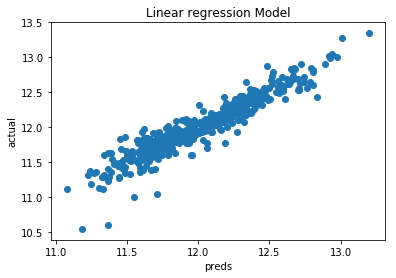

In [179]:
plt.scatter(pred, y_test)
plt.ylabel("actual")
plt.xlabel("preds")
plt.title("Linear regression Model")
plt.show()

## Try to improve the model

#### We'll next try using Ridge Regularization to decrease the influence of less important features. Ridge Regularization is a process which shrinks the regression coefficients of less important features.We'll once again instantiate the model. The Ridge Regularization model takes a parameter, alpha , which controls the strength of the regularization.We'll experiment by looping through a few different values of alpha, and see how this changes our results.

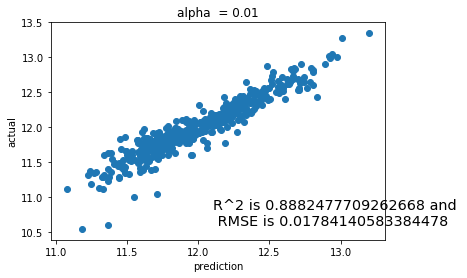

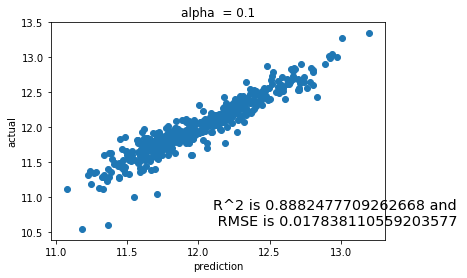

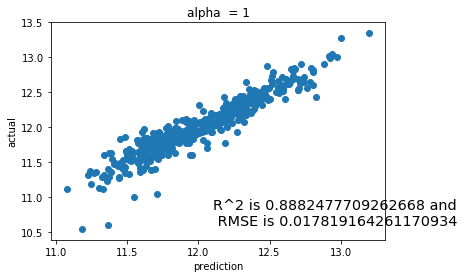

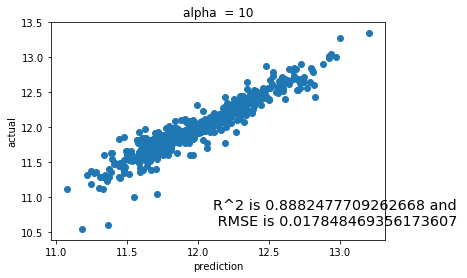

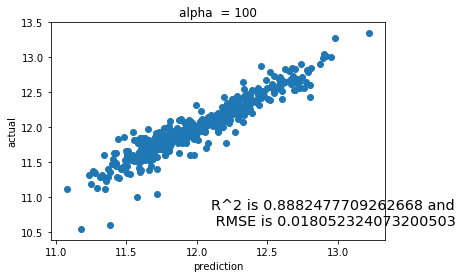

In [191]:
for i in range(-2,3):
    alpha = 10 **i
    lr = linear_model.Ridge(alpha = alpha)
    ridge_model = lr.fit(X_train ,y_train)
    pred_ridge = ridge_model.predict(X_test)
    plt.scatter(pred_ridge , y_test)
    plt.xlabel("prediction")
    plt.ylabel("actual")
    plt.title("alpha  = {}".format(alpha))
    overlay = "R^2 is {} and \n RMSE is {}".format(model.score(X_test,y_test) , mean_squared_error(y_test ,pred_ridge,))
    plt.annotate(overlay , xy = (12.1, 10.6) , size = 'x-large')
    plt.show()


##### Mathematics behind lasso regression is quiet similar to that of ridge only difference being instead of adding squares of theta, we will add absolute value of Θ.  Θ is feature value



Here too, λ is the hypermeter, whose value is equal to the alpha in the Lasso function.

It uses L1 regularization technique (will be discussed later in this article)
It is generally used when we have more number of features, because it automatically does feature selection.
 

Now that you have a basic understanding of ridge and lasso regression, let’s think of an example where we have a large dataset, lets say it has 10,000 features. And we know that some of the independent features are correlated with other independent features. Then think, which regression would you use, Rigde or Lasso?

Let’s discuss it one by one. If we apply ridge regression to it, it will retain all of the features but will shrink the coefficients. But the problem is that model will still remain complex as there are 10,000 features, thus may lead to poor model performance.

Instead of ridge what if we apply lasso regression to this problem. The main problem with lasso regression is when we have correlated variables, it retains only one variable and sets other correlated variables to zero. That will possibly lead to some loss of information resulting in lower accuracy in our model.

Then what is the solution for this problem? Actually we have another type of regression, known as elastic net regression, which is basically a hybrid of ridge and lasso regression. So let’s try to understand it.